In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv('Delhi.csv')
df_train.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
df_train['PSF']=df_train['Price']/df_train['Area']
df_train.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,PSF
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,8750.000000
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6000.000000
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11111.111111
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5747.126437
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6444.444444


In [4]:
df_train.Location.unique()

array(['Sector 10 Dwarka', 'Uttam Nagar', 'Sarita Vihar', 'Dwarka Mor',
       'Sector 7 Dwarka', 'Sector 6 Dwarka', 'Sector 5 Dwarka',
       'Sector 23 Rohini', 'Mayur Vihar II', 'Sector 24 Rohini',
       'Sector 11 Dwarka', 'Sector 23 Dwarka', 'Sector 12 Dwarka',
       'West End', 'Sector 9 Rohini', 'Mundka', 'Sector 13 Rohini',
       'Jamia Nagar', 'Sector 19 Dwarka', 'Sector 17 Dwarka', 'Bindapur',
       'Sector-18 Dwarka', 'Vasant Kunj', 'Shastri Nagar',
       'Sector-8 Rohini', 'Sector 9 Dwarka', 'Shanti Park Dwarka',
       'Govindpuri', 'Sector 22 Dwarka', 'Matiala', 'Saket',
       'Mahavir Enclave', 'Burari', 'Shahdara', 'Babarpur', 'Khanpur',
       'Sector 13 Dwarka', 'Mansa Ram Park', 'Green Park', 'Kalkaji',
       'Sector 4 Dwarka', 'DLF Phase 5', 'Sector 3 Dwarka',
       'Chittaranjan Park', 'Chattarpur', 'Greater Kailash',
       'Sector-14 Rohini', 'Paschim Vihar', 'Pitampura',
       'Sector 18B Dwarka', 'Sector 2 Dwarka', 'Jasola',
       'Pochanpur Colony', 

c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

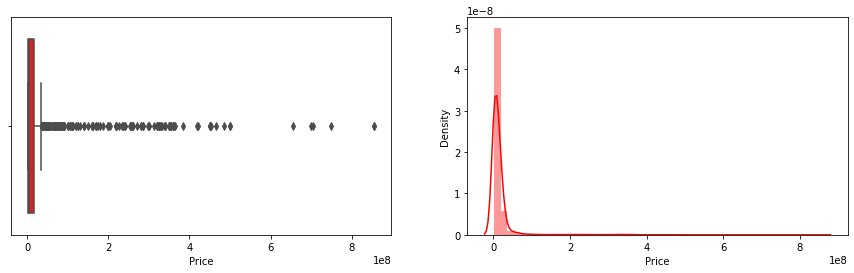

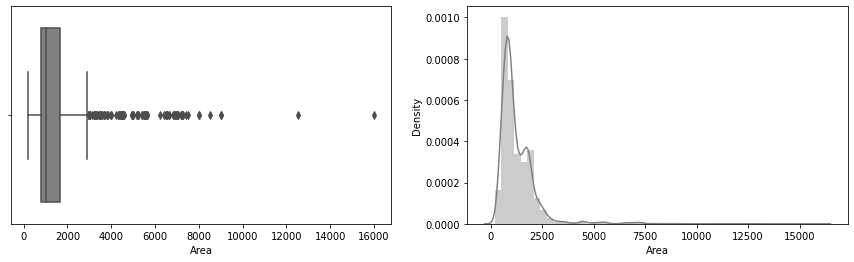

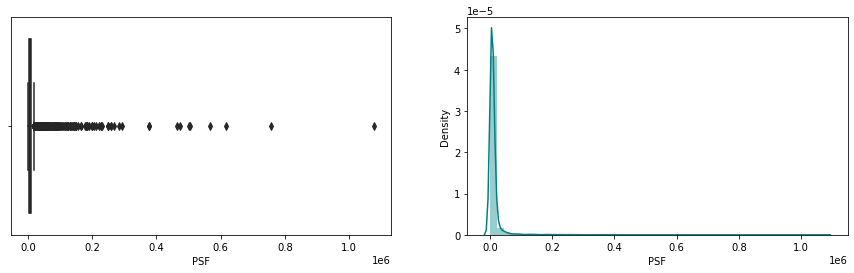

In [5]:
def dist_plot (feature, color, position=121):
    plt.figure(figsize=(15,4))
    plt.subplot(position)
    sns.boxplot(x=feature, data=df_train, color=color)
    plt.subplot(position+1)
    sns.distplot(df_train[feature], color=color)
dist_plot('Price', 'red')
dist_plot('Area', 'grey')
dist_plot('PSF', 'teal')

In [6]:
price_psf_outliers = np.percentile(df_train.PSF, [5,90])
price_outliers = np.percentile(df_train.Price, [5,90])
area_outliers = np.percentile(df_train.Area, [5,90])
# create filters based on outliers
price_psf_filter = (df_train.PSF > price_psf_outliers[0]) & (df_train.PSF < price_psf_outliers[1])
price_filter = (df_train.Price > price_outliers[0]) & (df_train.Price < price_outliers[1])
area_filter = (df_train.Area > area_outliers[0]) & (df_train.Area < area_outliers[1])
# apply filters
df_train = df_train[(price_psf_filter) & (price_filter) & (area_filter)]

c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

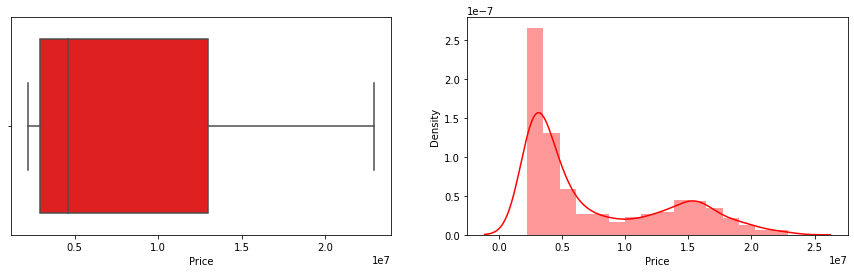

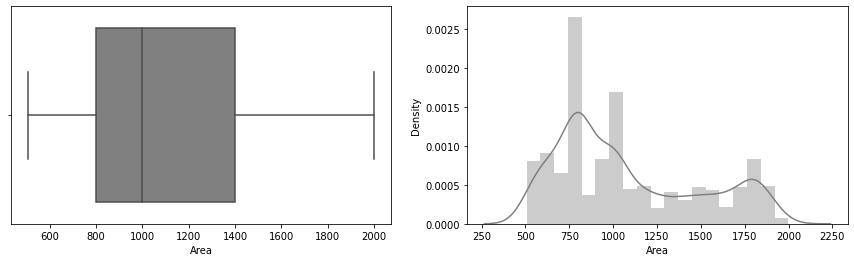

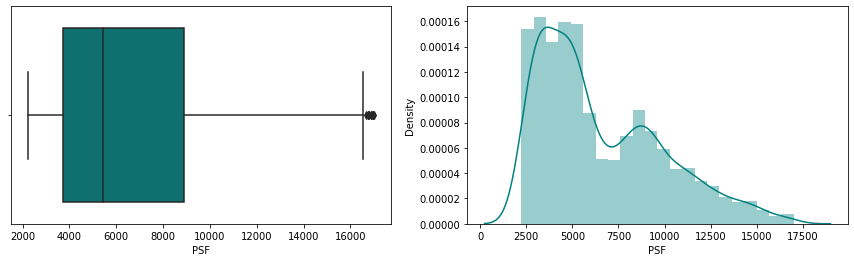

In [7]:
def dist_plot (feature, color, position=121):
    plt.figure(figsize=(15,4))
    plt.subplot(position)
    sns.boxplot(x=feature, data=df_train, color=color)
    plt.subplot(position+1)
    sns.distplot(df_train[feature], color=color)
dist_plot('Price', 'red')
dist_plot('Area', 'grey')
dist_plot('PSF', 'teal')

In [8]:
df_train.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'PSF'],
      dtype='object')

In [9]:
df_train.rename(columns={'No. of Bedrooms':'Bedrooms', "Children'splayarea":'PlayArea'}, inplace=True)


In [10]:
feature_dict = {'MaintenanceStaff':2, 'Gymnasium':4, 'SwimmingPool':4,'LandscapedGardens':3, 'JoggingTrack':3, 'RainWaterHarvesting':2,'IndoorGames':3, 'ShoppingMall':2, 'Intercom':2, 'SportsFacility':3, 'ATM':2, 'ClubHouse':2, 'School':2, '24X7Security':1, 'PowerBackup':4, 'CarParking':3, 'StaffQuarter':0, 'Cafeteria':0, 'MultipurposeRoom':2, 'Hospital':3, 'WashingMachine':0, 'Gasconnection':2, 'AC':0, 'Wifi':0, 'PlayArea':3, 'LiftAvailable':0, 'BED':0, 'VaastuCompliant':0, 'Microwave':0, 'GolfCourse':0, 'TV':0, 'DiningTable':0, 'Sofa':0, 'Wardrobe':0, 'Refrigerator':0}

In [11]:
features = pd.DataFrame(feature_dict.items(), columns=['Features', 'Weight'])
features.head()


,Features,Weight
0,MaintenanceStaff,2
1,Gymnasium,4
2,SwimmingPool,4
3,LandscapedGardens,3
4,JoggingTrack,3


In [12]:
features_matrix = df_train[['MaintenanceStaff', 'Gymnasium', 'SwimmingPool',
       'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting',
       'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM',
       'ClubHouse', 'School', '24X7Security', 'PowerBackup', 'CarParking',
       'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 'Hospital',
       'WashingMachine', 'Gasconnection', 'AC', 'Wifi', 'PlayArea',
       'LiftAvailable', 'BED', 'VaastuCompliant', 'Microwave',
       'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator']]
features_matrix.replace(9, 0, inplace=True)
    

c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [13]:
feature_scores_df = np.dot(features_matrix, features['Weight'])
df_train['FeatureScore'] = feature_scores_df
df_train.head()

,Price,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,PSF,FeatureScore
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,8750.000000,25
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6000.000000,9
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11111.111111,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6444.444444,3
5,15800000,1800,Sector 7 Dwarka,4,1,0,1,1,0,1,...,1,0,0,0,0,0,0,0,8777.777778,30


<AxesSubplot:>

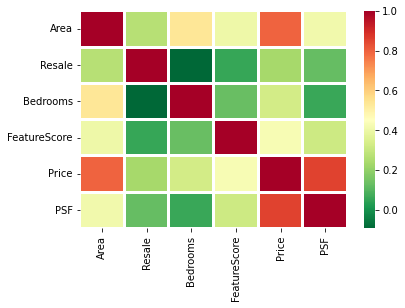

In [14]:
corr_df = df_train[['Area', 'Resale', 'Bedrooms', 'FeatureScore', 'Price','PSF']]
sns.heatmap(corr_df.corr(method='pearson'), cmap='RdYlGn_r', linewidths=2)

In [15]:
train_one_hot = pd.get_dummies(df_train, columns=['Location'])
train_one_hot.head()

,Price,Area,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Location_West End,Location_West Punjabi Bagh,Location_West Sagarpur,Location_Zakir Nagar,Location_greater kailash Enclave 1,Location_i p extension patparganj,Location_mayur vihar phase 1,Location_nawada,Location_param puri,Location_vikaspuri
0,10500000,1200,2,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6000000,1000,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5800000,900,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15800000,1800,4,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
location_pivot = pd.pivot_table(data=df_train, index='Location', aggfunc='mean', values='PSF')
location_pivot

,PSF
Location,
10 Sector Dwarka,6666.666667
3 Dwarka Sector 9 Road,8301.158301
75 Sector 22 Road,7505.773672
77 Sector 6 Road,4334.365325
78 Sector 6 Road,11574.074074
...,...
i p extension patparganj,11607.378129
mayur vihar phase 1,7700.735992
nawada,5772.095674


In [17]:
location_pivot['LocationPremium'] = location_pivot['PSF'] / location_pivot['PSF'].min()
location_pivot.sort_values('LocationPremium', ascending=False)

,PSF,LocationPremium
Location,,
Safdarjung Enclave,16666.666667,6.862745
Kailash Colony,16363.636364,6.737968
Sector-D Vasant Kunj,15517.241379,6.389452
Sector 14 Dwarka,15384.615385,6.334842
Sector24,15294.117647,6.297578
...,...,...
Ghitorni,2676.056338,1.101906
Sector 1 Dwarka,2615.384615,1.076923
Sushant Lok Phase 1 Barakhamba,2555.555556,1.052288


In [18]:
df_train = pd.merge(df_train, location_pivot['LocationPremium'], on='Location')
df_train['LogPremium'] = np.log(df_train['LocationPremium'])
df_train.head()

,Price,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,PSF,FeatureScore,LocationPremium,LogPremium
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,0,0,0,0,0,0,8750.000000,25,3.705317,1.309769
1,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,0,0,0,0,0,0,8750.000000,25,3.705317,1.309769
2,16200000,1600,Sector 10 Dwarka,3,1,0,0,0,0,0,...,0,0,0,0,0,0,10125.000000,0,3.705317,1.309769
3,17000000,1900,Sector 10 Dwarka,3,1,0,1,1,0,1,...,0,0,0,0,0,0,8947.368421,28,3.705317,1.309769
4,15500000,1600,Sector 10 Dwarka,3,1,0,0,0,0,0,...,0,0,0,0,0,0,9687.500000,14,3.705317,1.309769


In [19]:
df_train.head()

,Price,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,PSF,FeatureScore,LocationPremium,LogPremium
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,0,0,0,0,0,0,8750.000000,25,3.705317,1.309769
1,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,0,0,0,0,0,0,8750.000000,25,3.705317,1.309769
2,16200000,1600,Sector 10 Dwarka,3,1,0,0,0,0,0,...,0,0,0,0,0,0,10125.000000,0,3.705317,1.309769
3,17000000,1900,Sector 10 Dwarka,3,1,0,1,1,0,1,...,0,0,0,0,0,0,8947.368421,28,3.705317,1.309769
4,15500000,1600,Sector 10 Dwarka,3,1,0,0,0,0,0,...,0,0,0,0,0,0,9687.500000,14,3.705317,1.309769


In [20]:
from sklearn.model_selection import train_test_split
X = df_train.drop(['Price','MaintenanceStaff', 'Gymnasium', 'SwimmingPool',
       'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting',
       'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM',
       'ClubHouse', 'School', '24X7Security', 'PowerBackup', 'CarParking',
       'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 'Hospital',
       'WashingMachine', 'Gasconnection', 'AC', 'Wifi', 'PlayArea',
       'LiftAvailable', 'BED', 'VaastuCompliant', 'Microwave',
       'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator','Location','Resale'], axis=1)
y = df_train['Price']
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
errors=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error = mean_absolute_error(predictions, y_test)
    print(error)
    errors.append(error)
print(f'Mean Error {np.mean(errors)}')

695132.5427246491
688930.8984930725
687088.256072689
690673.3071042865
689422.9955912938
689161.154906218
683405.9222444042
703474.5330561837
680533.0323567674
707491.1127255216
Mean Error 691531.3755275087


In [22]:
#import forrest Regression
from sklearn.ensemble import RandomForestRegressor
errors=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    model = RandomForestRegressor(n_estimators=100, random_state=42,max_leaf_nodes=100)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error = mean_absolute_error(predictions, y_test)
    print(error)
    errors.append(error)
print(f'Mean Error {np.mean(errors)}')

188222.21316226595
189587.03234344706
206054.36934535016
197114.2278891609
195674.73231686084
198044.60821561582
166784.0754917422
193784.94358899366
212327.01978258413
181630.17266869548
Mean Error 192922.33948047162


In [23]:
#import decision tree Regression
from sklearn.tree import DecisionTreeRegressor
errors=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    model = DecisionTreeRegressor(random_state=42, max_leaf_nodes=50)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error = mean_absolute_error(predictions, y_test)
    print(error)
    errors.append(error)
print(f'Mean Error {np.mean(errors)}')

460650.87531394407
449222.9078555408
469320.5012898954
450138.80030516617
457473.8410001915
463097.5412846756
450295.8302145749
452755.9224627312
478119.90255017753
445276.7529396971
Mean Error 457635.2875216595


In [24]:
#import gradient boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
errors=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    model = GradientBoostingRegressor(random_state=42, max_leaf_nodes=50)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error = mean_absolute_error(predictions, y_test)
    print(error)
    errors.append(error)
print(f'Mean Error {np.mean(errors)}')

175355.0555186616
157869.40124008158
182946.8443464207
176914.216651389
184900.3222798237
167584.82065027131
158435.03980246824
170698.71703315518
185496.26513488212
165823.31451935516
Mean Error 172602.39971765087


In [25]:
#import ridge Regression
from sklearn.linear_model import Ridge
errors=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    model = Ridge(alpha=0.1)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error = mean_absolute_error(predictions, y_test)
    print(error)
    errors.append(error)
print(f'Mean Error {np.mean(errors)}')


695145.4993426952
688925.8398116968
687105.255784296
690702.1256099308
689415.9418597224
689173.612587022
683432.8516496284
703485.077773179
680548.3520957079
707538.1846178292
Mean Error 691547.2741131708


In [26]:
#import XGBoost Regression
from xgboost import XGBRegressor
errors=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error = mean_absolute_error(predictions, y_test)
    print(error)
    errors.append(error)
print(f'Mean Error {np.mean(errors)}')

95593.01996450755
90191.93278615794
91378.54747116238
101814.1754658385
93428.41947648625
86062.58163265306
92753.0363797693
96035.31499556344
89198.27129547471
91130.16348713398
Mean Error 92758.5462954747


In [27]:
from sklearn.neural_network import MLPRegressor
errors=[]
for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    model = MLPRegressor(hidden_layer_sizes=(100,50,20,10), random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error = mean_absolute_error(predictions, y_test)
    print(error)
    errors.append(error)
print(f'Mean Error {np.mean(errors)}')

c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


2341616.37550287


c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


2405435.990553432


c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


2362446.663231527
2374437.036855566
Mean Error 2370984.016535849


c:\Users\rehan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(2288, 6)


,Area,Bedrooms,PSF,FeatureScore,LocationPremium,LogPremium
243,750,2,4666.666667,3,2.128878,0.755595
1124,630,3,3968.253968,0,1.782768,0.578167
3192,800,2,3511.250000,0,1.291702,0.255961
1351,540,2,4259.259259,0,1.897019,0.640284
3303,978,2,5521.472393,0,1.860486,0.620838


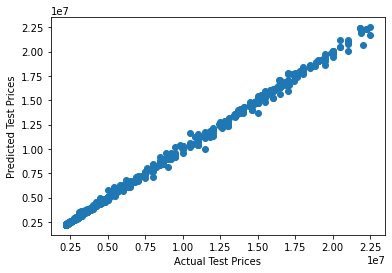

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
model1 =  XGBRegressor(random_state=50)
model1.fit(X_train, y_train)
predictions = model1.predict(X_test)
plt.scatter(x=y_test, y=predictions)
plt.xlabel('Actual Test Prices')
plt.ylabel('Predicted Test Prices')
print(X_train.shape)
X_train.head()

In [29]:
#import pickle
#pickle.dump(model1, open('model1.pkl','wb'))